## Predicting the Value of CO2 Emission


Now that you have been equipped with the skills over the course of 'Data Science and Analytics', now you have a chance to practice and apply it on a dataset.

### In this project, you need to build a model to predict the unknown value. ###


#### Thinking like a data scientist, you have to follow the data science methodology, as shown in the image below:

 ***1.⁠ ⁠Businuess Understanding***

Data science methodology begins with spending the time to seek clarification. What is the problem that you are trying to solve?

Our problem here is finding the value of the CO2 Emission.


Main Goal: Predict the value of CO2 emission based on single independent variable.

Main Object: Building a predictive model.

 ***2.⁠ ⁠Analytic Approach***

How can you use data to answer the question/solve the problem?

Selecting the right analytic approach to solve the problem. In this project the problem is about predicting the CO2 Emission. So we are going to use Simple Linear Regression algorithm to solve the problem.

 ***3.⁠ ⁠Data Requirements***

Necessary data content, Data Formats, Sources for initial data collection.
In this project we need to collect data about the CO2 emission, engine size, and Fuel consumption.


 ***4.⁠ ⁠Data Collection***

After the initial data collection is performed, an assessment by the data scientist takes place to determine whether or not they have what they need.

 ***5.⁠ ⁠Data Understanding***

Data understanding encompasses all activities related to constructing the data set.

FuelConsumption.csv, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.

-   *MODELYEAR* e.g. 2014
-   *MAKE* e.g. Acura
-   *MODEL* e.g. ILX
-   *VEHICLE CLASS* e.g. SUV
-   *ENGINE SIZE* e.g. 4.7
-   *CYLINDERS* e.g 6
-   *TRANSMISSION* e.g. A6
-   *FUEL CONSUMPTION in CITY(L/100 km)* e.g. 9.9
-   *FUEL CONSUMPTION in HWY (L/100 km)* e.g. 8.9
-   *FUEL CONSUMPTION COMB (L/100 km)* e.g. 9.2
-   *CO2 EMISSIONS (g/km)* e.g. 182   --> low --> 0

In [4]:
# Reading the dataset

# Importing pandas to read the .csv file format
import pandas as pd

# Using the read_csv to read the .csv file format
df = pd.read_csv('FuelConsumption.csv')

# Reading the first five rowsof the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
# Checking the number of rows & columns
df.shape

(1067, 13)

In [6]:
# General information of the dataset
ç

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [7]:
# Statistical summary about the dataset
df.describe(include='all')

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067,1067,1067,1067.000000,1067.000000,1067,1067,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
unique,NaN,39,663,16,NaN,NaN,22,4,NaN,NaN,NaN,NaN,NaN
top,NaN,FORD,F150 FFV,MID-SIZE,NaN,NaN,A6,X,NaN,NaN,NaN,NaN,NaN
freq,NaN,90,8,178,NaN,NaN,222,514,NaN,NaN,NaN,NaN,NaN
mean,2014.0,NaN,NaN,NaN,3.346298,5.794752,NaN,NaN,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,NaN,NaN,NaN,1.415895,1.797447,NaN,NaN,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,NaN,NaN,NaN,1.000000,3.000000,NaN,NaN,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,NaN,NaN,NaN,3.400000,6.000000,NaN,NaN,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,NaN,NaN,NaN,4.300000,8.000000,NaN,NaN,15.550000,10.850000,13.350000,31.000000,294.000000


In [8]:
# Checking the missing values
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

 ***6.⁠ ⁠Data Preparation***

Together with data collection and data understanding, data preparation is the most time-consuming phase of a data science project, typically taking 70% and even up to even 90% of the overall project time.

### Data Wrangling: You have to check and solve all the issues of the dataset

### EDA

In [10]:
# Importing the visualization library
import numpy as np
df_numeric = df.select_dtypes(include=np.number)

# Shows the correlated features towards co2 emission
df_numeric.corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


### Plotting the correlated features to co2 emission

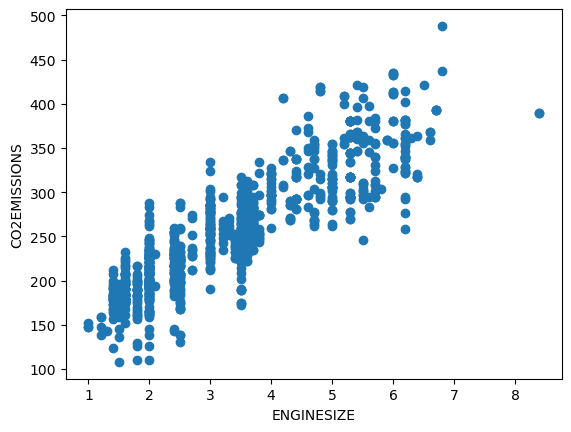

In [13]:
# Importing the visualization library
import matplotlib.pyplot as plt

# Visualize correlated feature to co2 emission
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS)

plt.xlabel('ENGINESIZE') #label the x-axis
plt.ylabel('CO2EMISSIONS') #label the y-axis
plt.show()

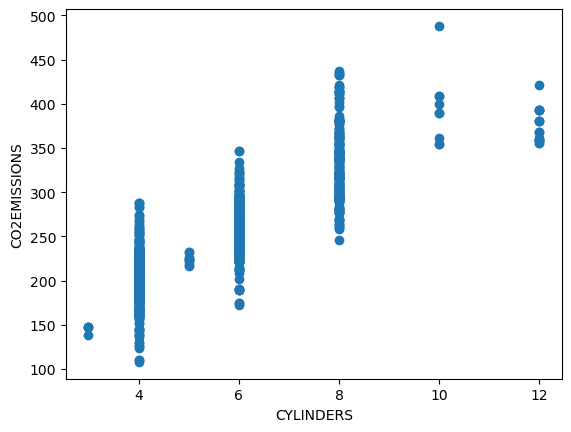

In [12]:
# Importing the visualization library
import matplotlib.pyplot as plt

# Visualize correlated feature to co2 emission
plt.scatter(df.CYLINDERS, df.CO2EMISSIONS)

plt.xlabel('CYLINDERS') #label the x-axis
plt.ylabel('CO2EMISSIONS') #label the y-axis
plt.show()

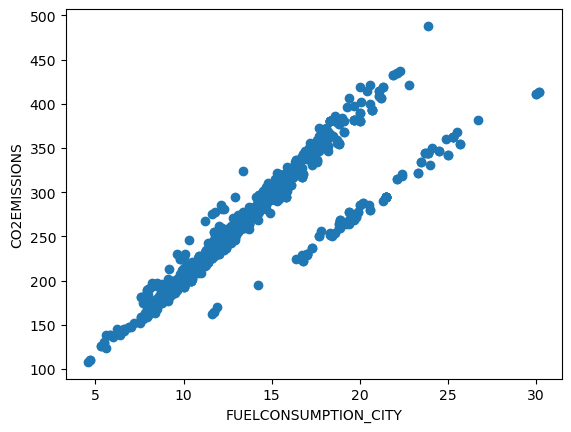

In [14]:
# Importing the visualization library
import matplotlib.pyplot as plt

# Visualize correlated feature to co2 emission
plt.scatter(df.FUELCONSUMPTION_CITY, df.CO2EMISSIONS)

plt.xlabel('FUELCONSUMPTION_CITY') #label the x-axis
plt.ylabel('CO2EMISSIONS') #label the y-axis
plt.show()

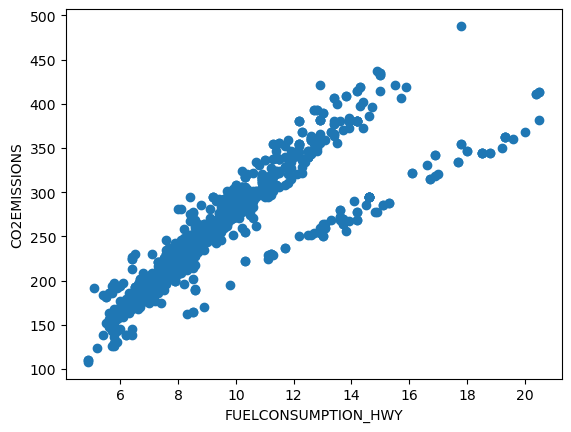

In [15]:
# Importing the visualization library
import matplotlib.pyplot as plt

# Visualize correlated feature to co2 emission
plt.scatter(df.FUELCONSUMPTION_HWY, df.CO2EMISSIONS)

plt.xlabel('FUELCONSUMPTION_HWY') #label the x-axis
plt.ylabel('CO2EMISSIONS') #label the y-axis
plt.show()

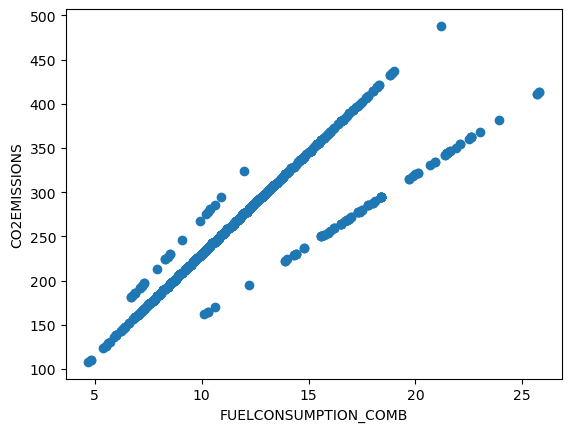

In [16]:
# Importing the visualization library
import matplotlib.pyplot as plt

# Visualize correlated feature to co2 emission
plt.scatter(df.FUELCONSUMPTION_COMB, df.CO2EMISSIONS)

plt.xlabel('FUELCONSUMPTION_COMB') #label the x-axis
plt.ylabel('CO2EMISSIONS') #label the y-axis
plt.show()

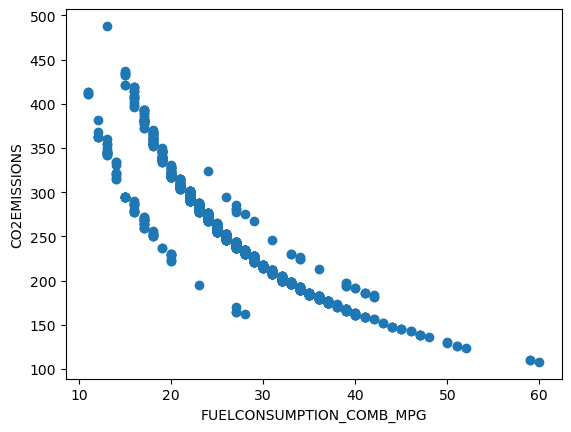

In [17]:
# Importing the visualization library
import matplotlib.pyplot as plt

# Visualize correlated feature to co2 emission
plt.scatter(df.FUELCONSUMPTION_COMB_MPG, df.CO2EMISSIONS)

plt.xlabel('FUELCONSUMPTION_COMB_MPG') #label the x-axis
plt.ylabel('CO2EMISSIONS') #label the y-axis
plt.show()

***Creating the training and testing sets***

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We create a mask to select random rows using np.random.rand() function:

In [23]:
# Importing the visualization library
import numpy as np

# Select random data for being use for train (80%)
msk = np.random.rand(len(df)) < 0.8

#msk_test = np.random.rand(len(df)) < 0.2 (if using both, data that include into train might be using also in the test)

train = df[msk]
test = df[~msk]

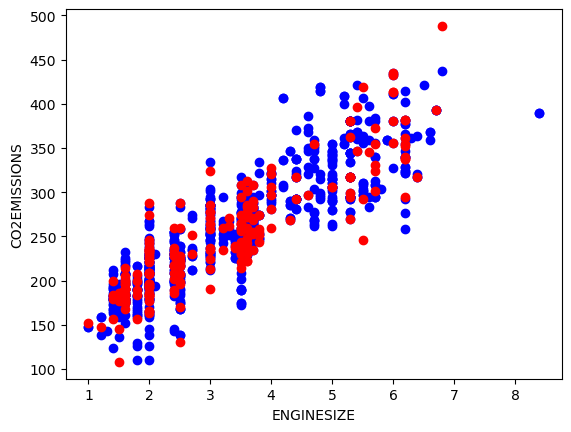

In [24]:
# Importing the visualization library
import matplotlib.pyplot as plt

# Visualize correlated feature to co2 emission
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color ='blue') 
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color ='red') 

plt.xlabel('ENGINESIZE') #label the x-axis
plt.ylabel('CO2EMISSIONS') #label the y-axis
plt.show()

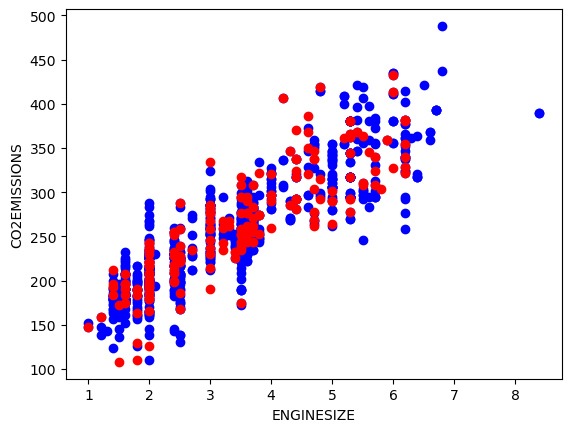

In [22]:
# To check that different data will be shown from above chart(because we select random data)
# Importing the visualization library
import matplotlib.pyplot as plt

# Visualize correlated feature to co2 emission
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color ='blue') 
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color ='red') 

plt.xlabel('ENGINESIZE') #label the x-axis
plt.ylabel('CO2EMISSIONS') #label the y-axis
plt.show()

***7. Modeling***

In [28]:
#importing the linear model from scikit learn to use simple linear regression
from sklearn import linear_model
regr = linear_model.LinearRegression()

#convert to array
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit(train_x, train_y)

#checking the theta zero & theta one of simple linear regression
print ('Theta Zero is: ', regr.intercept_)
print ('Theta One is: ', regr.coef_)

Theta Zero is:  [125.75443297]
Theta One is:  [[39.01803646]]


***Simple Linear Regression Equation:***
$$\mathbf{ yhat = \theta_0 + \theta_1X }$$

As mentioned before, *Coefficient* and *Intercept* in the simple linear regression, are the parameters of the fit line. 
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. 
Notice that all of the data must be available to traverse and calculate the parameters.

In [29]:
x = 2.4

yhat = regr.intercept_ + regr.coef_ * x
yhat

array([[219.39772048]])

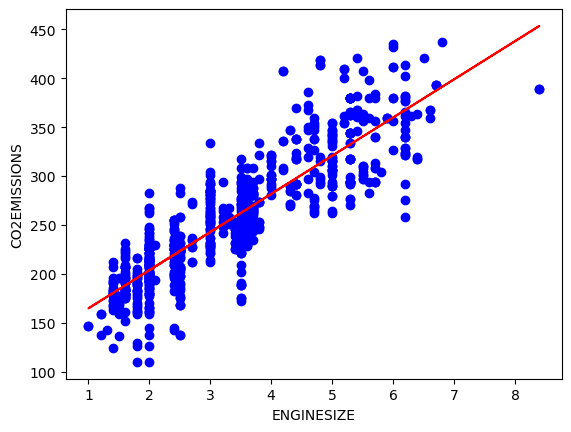

In [31]:
# Visualize the best fitter line of linear regression on the training set
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color ='blue') 

# To plot the fit line
plt.plot(train_x, regr.intercept_[0] + regr.coef_[0][0]* train_x, 'red')

plt.xlabel('ENGINESIZE') #label the x-axis
plt.ylabel('CO2EMISSIONS') #label the y-axis
plt.show()

***8.⁠ ⁠Evaluation*** 

we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 


- Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.
- Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
- Root Mean Squared Error (RMSE).
- R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


In [37]:
from sklearn.metrics import r2_score

#convert to array
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

# Test predicted result
test_y_ = regr.predict(test_x)

# Print mean absolute error of our model
print ('The Mean absolute Errors is: ',np.mean(np.absolute(test_y_ - test_y)))

# Print mean square error of our model
print ('The Mean Squared Error is: ',np.mean((test_y_ - test_y)**2))

# Print calculated accuracy of our model
print('The Accuracy of the model (R Squared) is: ',r2_score(test_y, test_y_)*100)

The Mean absolute Errors is:  23.46238833417058
The Mean Squared Error is:  953.4325373989598
The Accuracy of the model (R Squared) is:  77.89800088520535


***9. Deployment***

***10. Feedback***